In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import qqplot
import os

In [2]:
data = pd.read_csv('steel.csv', sep=";", decimal=',')

In [3]:
data.head()

,Equip No.,Service description,PO Price,PO Currency,PO Date,Vendor Name,Vendor Country,MOC shell,Painted color,Diameter\n[mm],Lenght\r\n[mm],Fabricated weight\r\n[kg],Thickness shell\r\n[mm],Design P\n[bar],Design T Max\n[degC]
0,V-001,Vessel 1,37452.08,EUR,01/01/2016,Mechanics & co.,Europe,CS,White,4267.2,12801.6,50000,22.2,3.4,340
1,V-002,Vessel 2,37779.92,USD,01/02/2016,Pipes 'n Plates,North America,CS,Black,1828.8,6096.0,70000,12.7,3.4,175
2,V-003,Vessel 3,32166.21,EUR,01/07/2016,Mechanics & co.,Europe,CS,Green,4267.2,7620.0,26000,15.9,3.4,175
3,V-004,Vessel 4,20283.32,USD,01/01/2017,Pipes 'n Plates,North America,CS,Black,2743.2,3505.2,9500,0.0,3.4,150
4,V-005,Vessel 5,28984.84,EUR,01/02/2015,Mechanics & co.,Europe,CS,White,2743.2,6096.0,21000,15.9,5.2,225


In [4]:
# Converting to Euro

currencies = data['PO Currency'].unique().tolist()
currencies = dict.fromkeys(currencies, pd.NA)

currencies['USD'] = 1.08313
currencies['EUR'] = 0.92324884

from currency_converter import CurrencyConverter
c = CurrencyConverter()
for key in currencies:
   try:
      currencies[key] = c.convert(1, 'EUR', key)
   except:
      pass
    
data['PO_Price_Euro'] = data.apply(lambda x: x['PO Price'] / currencies[x['PO Currency']], axis=1 ).round()

In [5]:
data.head()

,Equip No.,Service description,PO Price,PO Currency,PO Date,Vendor Name,Vendor Country,MOC shell,Painted color,Diameter\n[mm],Lenght\r\n[mm],Fabricated weight\r\n[kg],Thickness shell\r\n[mm],Design P\n[bar],Design T Max\n[degC],PO_Price_Euro
0,V-001,Vessel 1,37452.08,EUR,01/01/2016,Mechanics & co.,Europe,CS,White,4267.2,12801.6,50000,22.2,3.4,340,37452.0
1,V-002,Vessel 2,37779.92,USD,01/02/2016,Pipes 'n Plates,North America,CS,Black,1828.8,6096.0,70000,12.7,3.4,175,34936.0
2,V-003,Vessel 3,32166.21,EUR,01/07/2016,Mechanics & co.,Europe,CS,Green,4267.2,7620.0,26000,15.9,3.4,175,32166.0
3,V-004,Vessel 4,20283.32,USD,01/01/2017,Pipes 'n Plates,North America,CS,Black,2743.2,3505.2,9500,0.0,3.4,150,18757.0
4,V-005,Vessel 5,28984.84,EUR,01/02/2015,Mechanics & co.,Europe,CS,White,2743.2,6096.0,21000,15.9,5.2,225,28985.0


In [6]:
data_steel = data.copy()
data_steel.rename(columns = {'Diameter\n[mm]':'Diameter', 
                             'Lenght\r\n[mm]': 'Length', 
                             'Fabricated weight\r\n[kg]':'Fabricated_weight', 
                             'Thickness shell\r\n[mm]':'Thickness_shell',
                             'Design P\n[bar]':'Design_Pressure',
                             'Design T Max\n[degC]':'Design_T_max',
                             'PO Price':'PO_Price',
                             'PO Currency':'PO_Currency',
                             'PO Date':'PO_Date',
                             'Vendor Name':'Vendor_Name',
                             'Vendor Country':'Vendor_Country',
                             'MOC shell': 'MOC_shell',
                             'Painted color':'Painted_color'},
                  inplace = True)

In [7]:
numerical_features = data_steel.select_dtypes(include= 'number')
numerical_features = numerical_features.drop(columns = ['PO_Price'])


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'Diameter'),
  Text(1.5, 0, 'Length'),
  Text(2.5, 0, 'Fabricated_weight'),
  Text(3.5, 0, 'Thickness_shell'),
  Text(4.5, 0, 'Design_Pressure'),
  Text(5.5, 0, 'Design_T_max'),
  Text(6.5, 0, 'PO_Price_Euro')])

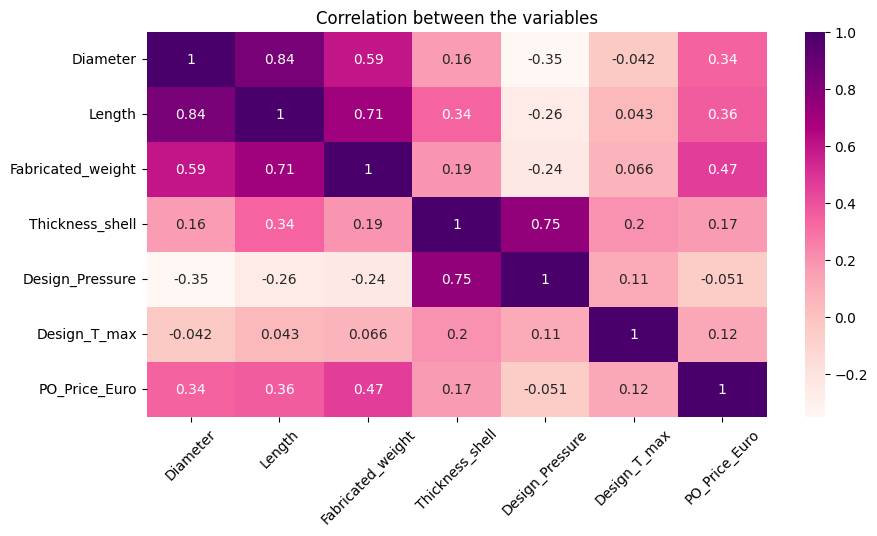

In [8]:
#correlation matrix and the heatmap

plt.subplots(figsize=(10,5))
cost_correlation=numerical_features.corr()
sns.heatmap(cost_correlation,annot=True,cmap='RdPu')
plt.title('Correlation between the variables')
plt.xticks(rotation=45)

In [9]:
round(np.abs(numerical_features.corr()['Fabricated_weight']).sort_values(ascending = False),2)

Fabricated_weight    1.00
Length               0.71
Diameter             0.59
PO_Price_Euro        0.47
Design_Pressure      0.24
Thickness_shell      0.19
Design_T_max         0.07
Name: Fabricated_weight, dtype: float64

In [25]:
# Create target variable y (Series)  and feature X (DataFrame) without data leaks!

features = ["Design_Pressure",
           "Thickness_shell",
           "Length",
           "Diameter",
           "Fabricated_weight"]

In [17]:
# num_feat_standardized = numerical_features.copy()
# for f in features:
#     mu = numerical_features[f].mean()
#     sigma = numerical_features[f].std()
#     num_feat_standardized[f] = numerical_features[f].map(lambda x: (x - mu) / sigma)
    
    
# num_feat_standardized.head()

,Diameter,Length,Fabricated_weight,Thickness_shell,Design_Pressure,Design_T_max,PO_Price_Euro
0,2.343950,2.992943,2.200705,0.765202,-0.624588,340,37452.0
1,-0.160394,0.383864,3.403905,-0.361282,-0.624588,175,34936.0
2,2.343950,0.976837,0.756864,0.018165,-0.624588,175,32166.0
3,0.778735,-0.624189,-0.235776,-1.867215,-0.624588,150,18757.0
4,0.778735,0.383864,0.456064,0.018165,-0.500053,225,28985.0


In [40]:

y = numerical_features["Fabricated_weight"].copy()

X= numerical_features[[
    "Diameter",
    "Length",
    "Thickness_shell",
    "Design_Pressure"
    ]].copy()

X.head()

,Diameter,Length,Thickness_shell,Design_Pressure
0,4267.2,12801.6,22.2,3.4
1,1828.8,6096.0,12.7,3.4
2,4267.2,7620.0,15.9,3.4
3,2743.2,3505.2,0.0,3.4
4,2743.2,6096.0,15.9,5.2


In [42]:
X_std = X.copy()

for f in X.columns:
    mu = X[f].mean()
    sigma = X[f].std()
    X_std[f] = X[f].map(lambda x: (x - mu) / sigma)
    
X_std.head(3)



,Diameter,Length,Thickness_shell,Design_Pressure
0,2.343950,2.992943,0.765202,-0.624588
1,-0.160394,0.383864,-0.361282,-0.624588
2,2.343950,0.976837,0.018165,-0.624588


In [43]:
X_std['constant'] = 1
X_std.head()

,Diameter,Length,Thickness_shell,Design_Pressure,constant
0,2.343950,2.992943,0.765202,-0.624588,1
1,-0.160394,0.383864,-0.361282,-0.624588,1
2,2.343950,0.976837,0.018165,-0.624588,1
3,0.778735,-0.624189,-1.867215,-0.624588,1
4,0.778735,0.383864,0.018165,-0.500053,1


In [45]:
#Multivariate
import statsmodels.api as sm

model = sm.OLS(y,X_std).fit()


In [46]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Fabricated_weight   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     10.50
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           5.48e-06
Time:                        19:41:33   Log-Likelihood:                -506.66
No. Observations:                  47   AIC:                             1023.
Df Residuals:                      42   BIC:                             1033.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Diameter         -252.3650   3403.820     -0.074      0.941   -7121.552    6616.822
Length           1.179e+04   4373.932      2.695      0.010    2959.702    2.06e+04
Thickness_shell  -185.1885   4939.545     -0.037      0.970   -1.02e+04    9783.216
Design_Pressure  -785.6132   4837.222     -0.162      0.872   -1.05e+04    8976.295
constant         1.342e+04   1794.210      7.479      0.000    9798.286     1.7e+04
==============================================================================
Omnibus:                       64.131   Durbin-Watson:                   1.745
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              452.692
Skew:                           3.611   Prob(JB):                     5.00e-99
Kurtosis:                      16.379   Cond. No.                         5.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

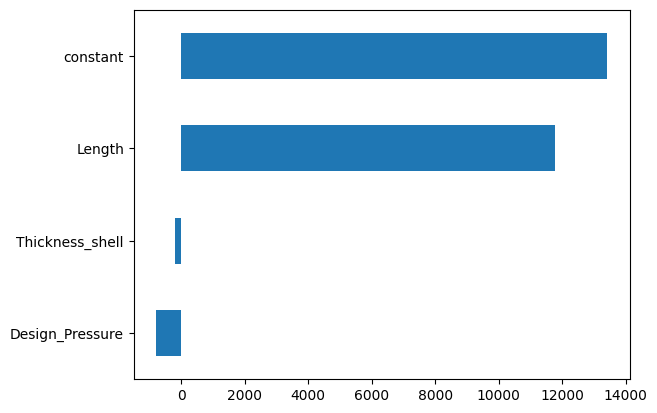

In [47]:
model.params[1:].sort_values().plot(kind='barh')

In [21]:
predicted_weight = model.predict(num_feat_standardized[features])
residuals = predicted_weight - num_feat_standardized['Fabricated_weight']

In [22]:
rmse = (residuals**2).mean()**0.5
rmse

0.6995293100981189

In [52]:
# Your predictions
y_pred = model.predict(X_std)


y_expected = numerical_features['Fabricated_weight']



In [ ]:
data['weight_predicted']

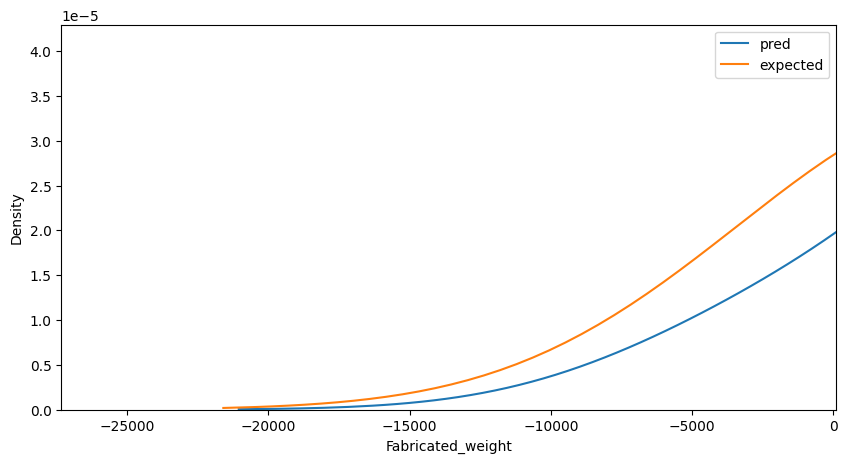

In [50]:
plt.figure(figsize = (10,5))

sns.kdeplot(y_pred, label = 'pred')
sns.kdeplot(y_expected, label = 'expected')
plt.xlim(xmax=100)
plt.legend()

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


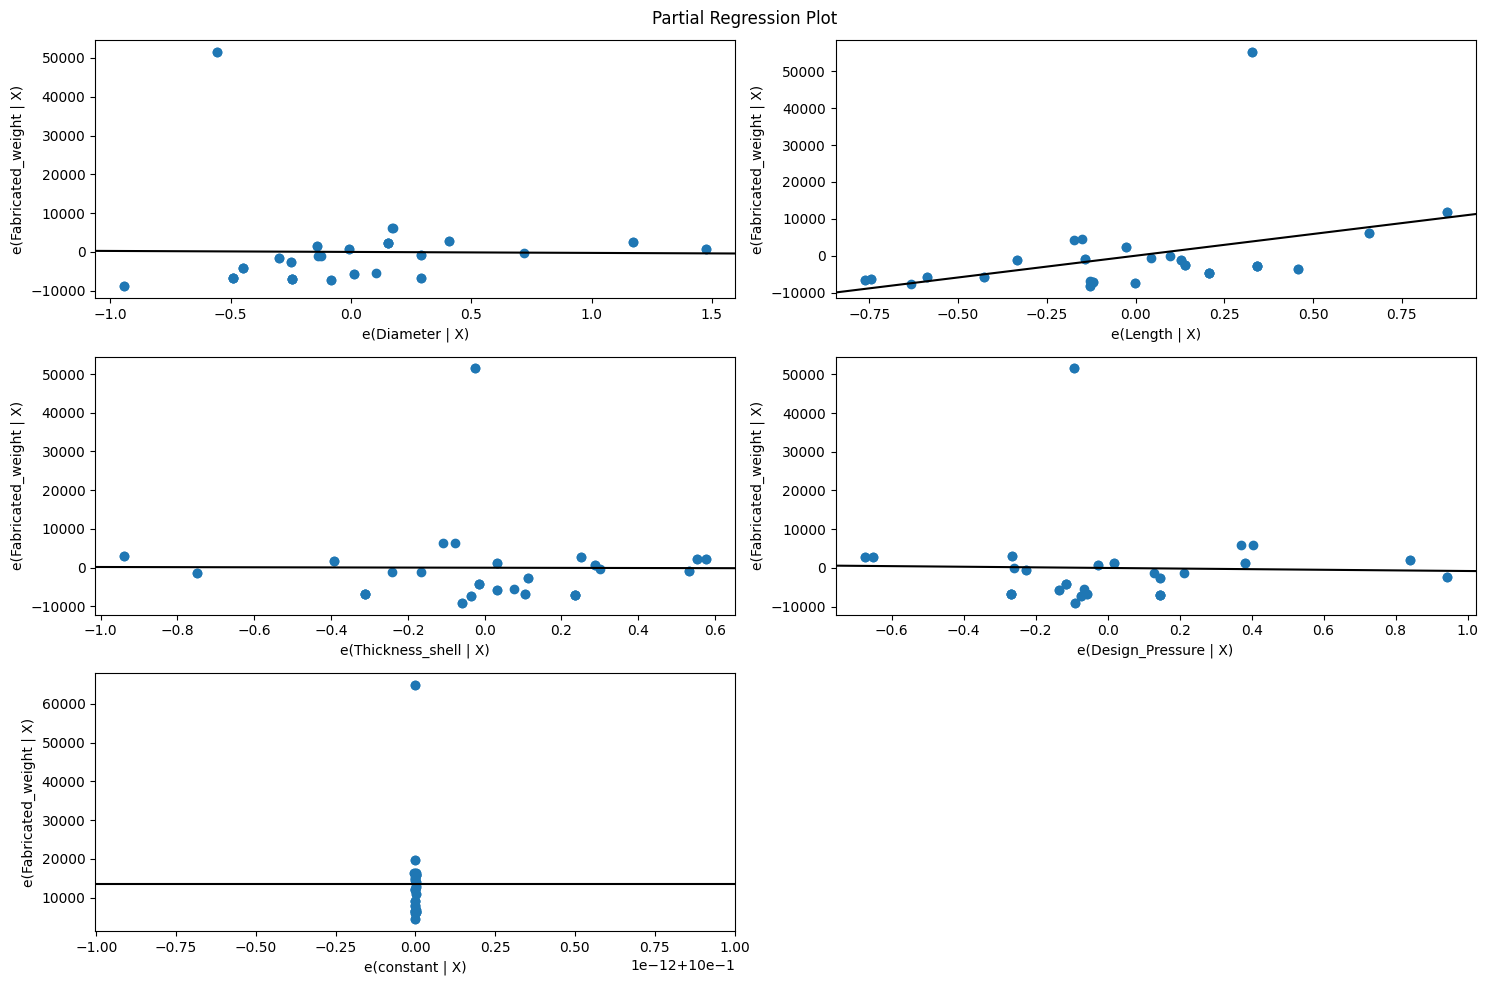

In [51]:
fig = plt.figure(figsize=(15,10))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.show()

In [55]:
model.intercept_

AttributeError: 'OLSResults' object has no attribute 'intercept_'